In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
entire_data = []
for spdt in ["02","03", "04", "05", "06", "07", "08", "09", "10"]:
    drive.mount('/content/gdrive')
    data = arff.loadarff('gdrive/My Drive/base_desenv_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_data.append(sub_df)

    data = arff.loadarff('gdrive/My Drive/base_validacao_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_data.append(sub_df)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call driv

In [ ]:
df = pd.concat(entire_data)
df

mcc_cat  mcc_ant_cat  cep_cat  cep_ant_cat  valor_trans_cat  \
0          9.0         22.0      3.0          3.0              6.0   
1         22.0         22.0      3.0          3.0              7.0   
2         22.0         22.0      3.0          3.0              7.0   
3          9.0          0.0      2.0          0.0              4.0   
4         15.0          9.0      2.0          2.0              4.0   
...        ...          ...      ...          ...              ...   
12654      8.0         15.0      6.0          6.0              6.0   
12655      6.0          6.0      1.0          1.0              2.0   
12656      3.0          0.0      5.0          0.0              4.0   
12657      7.0          0.0      2.0          0.0              2.0   
12658      6.0          6.0      6.0          6.0              3.0   

       valor_trans_ant_cat  pos_entry  lim_cred_cat  bandeira_cat  \
0                      6.0        2.0           6.0           2.0   
1                      7.0        2.0           6.0           2.0   
2                      7.0        2.0           6.0           2.0   
3                      1.0        2.0           4.0           2.0   
4                      4.0        2.0           4.0           2.0   
...                    ...        ...           ...           ...   
12654                  2.0        2.0           3.0           4.0   
12655                  2.0        2.0           1.0           4.0   
12656                  1.0        2.0           1.0           4.0   
12657                  1.0        1.0           1.0           4.0   
12658                  4.0        2.0           1.0           4.0   

       variante_cat  score_cat  tp_pessoa_cat  trans_nacional_cat  \
0               3.0        0.0            1.0                 0.0   
1               3.0        0.0            1.0                 0.0   
2               3.0        3.0            1.0                 0.0   
3               3.0        0.0            1.0                 0.0   
4               3.0        0.0            1.0                 0.0   
...             ...        ...            ...                 ...   
12654           1.0        0.0            1.0                 0.0   
12655           1.0        0.0            1.0                 0.0   
12656           1.0        0.0            1.0                 0.0   
12657           1.0        0.0            1.0                 0.0   
12658           1.0        0.0            1.0                 0.0   

       qtde_parc_cat  velocidade_cat  dif_score_cat  trans_limit_cat  \
0                1.0             7.0            1.0              0.0   
1                1.0             4.0            4.0              0.0   
2                1.0             6.0            5.0              0.0   
3                1.0             2.0            3.0              0.0   
4                1.0             3.0            3.0              0.0   
...              ...             ...            ...              ...   
12654            1.0             5.0            3.0              0.0   
12655            1.0             5.0            3.0              0.0   
12656            2.0             2.0            3.0              0.0   
12657            1.0             2.0            3.0              0.0   
12658            1.0             7.0            3.0              0.0   

      flag_fraude_cat  
0                b'N'  
1                b'N'  
2                b'S'  
3                b'N'  
4                b'N'  
...               ...  
12654            b'N'  
12655            b'N'  
12656            b'N'  
12657            b'N'  
12658            b'N'  

[374823 rows x 18 columns]

In [ ]:
df.describe()

mcc_cat    mcc_ant_cat        cep_cat    cep_ant_cat  \
count  374823.000000  374823.000000  374823.000000  374823.000000   
mean       10.903594       6.631066       3.903498       2.287608   
std         6.264215       7.300236       2.441054       2.648531   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       2.000000       0.000000   
50%         9.000000       6.000000       4.000000       1.000000   
75%        15.000000      12.000000       6.000000       4.000000   
max        32.000000      32.000000       9.000000       9.000000   

       valor_trans_cat  valor_trans_ant_cat      pos_entry   lim_cred_cat  \
count    374823.000000        374823.000000  374823.000000  374823.000000   
mean          4.992148             3.362643       3.834394       5.897376   
std           2.434372             2.712998       3.159801       2.430863   
min           1.000000             1.000000       0.000000       1.000000   
25%           3.000000             1.000000       2.000000       4.000000   
50%           5.000000             2.000000       2.000000       6.000000   
75%           7.000000             5.000000       9.000000       8.000000   
max           9.000000             9.000000       9.000000       9.000000   

        bandeira_cat   variante_cat      score_cat  tp_pessoa_cat  \
count  374823.000000  374823.000000  374823.000000  374823.000000   
mean        2.348597       2.015295       0.627632       0.983144   
std         1.717701       0.835288       1.699094       0.128732   
min         1.000000       1.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       1.000000   
50%         1.000000       2.000000       0.000000       1.000000   
75%         5.000000       3.000000       0.000000       1.000000   
max         5.000000       5.000000       9.000000       1.000000   

       trans_nacional_cat  qtde_parc_cat  velocidade_cat  dif_score_cat  \
count       374823.000000  374823.000000   374823.000000  374823.000000   
mean             0.004898       1.210195        3.365092       2.933561   
std              0.069816       0.466723        1.706867       0.984662   
min              0.000000       1.000000        1.000000       1.000000   
25%              0.000000       1.000000        2.000000       3.000000   
50%              0.000000       1.000000        2.000000       3.000000   
75%              0.000000       1.000000        5.000000       3.000000   
max              1.000000       3.000000        7.000000       5.000000   

       trans_limit_cat  
count    374823.000000  
mean          0.069945  
std           0.399692  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           9.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374823 entries, 0 to 12658
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mcc_cat              374823 non-null  float64
 1   mcc_ant_cat          374823 non-null  float64
 2   cep_cat              374823 non-null  float64
 3   cep_ant_cat          374823 non-null  float64
 4   valor_trans_cat      374823 non-null  float64
 5   valor_trans_ant_cat  374823 non-null  float64
 6   pos_entry            374823 non-null  float64
 7   lim_cred_cat         374823 non-null  float64
 8   bandeira_cat         374823 non-null  float64
 9   variante_cat         374823 non-null  float64
 10  score_cat            374823 non-null  float64
 11  tp_pessoa_cat        374823 non-null  float64
 12  trans_nacional_cat   374823 non-null  float64
 13  qtde_parc_cat        374823 non-null  float64
 14  velocidade_cat       374823 non-null  float64
 15  dif_score_cat     

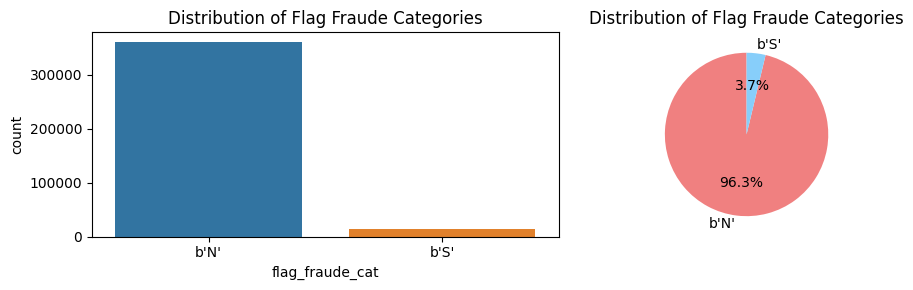

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
sns.countplot(x='flag_fraude_cat', data=df, ax=axes[0])
axes[0].set_title('Distribution of Flag Fraude Categories')
fraud_counts = df['flag_fraude_cat'].value_counts()
axes[1].pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('Distribution of Flag Fraude Categories')
plt.tight_layout()
plt.show()

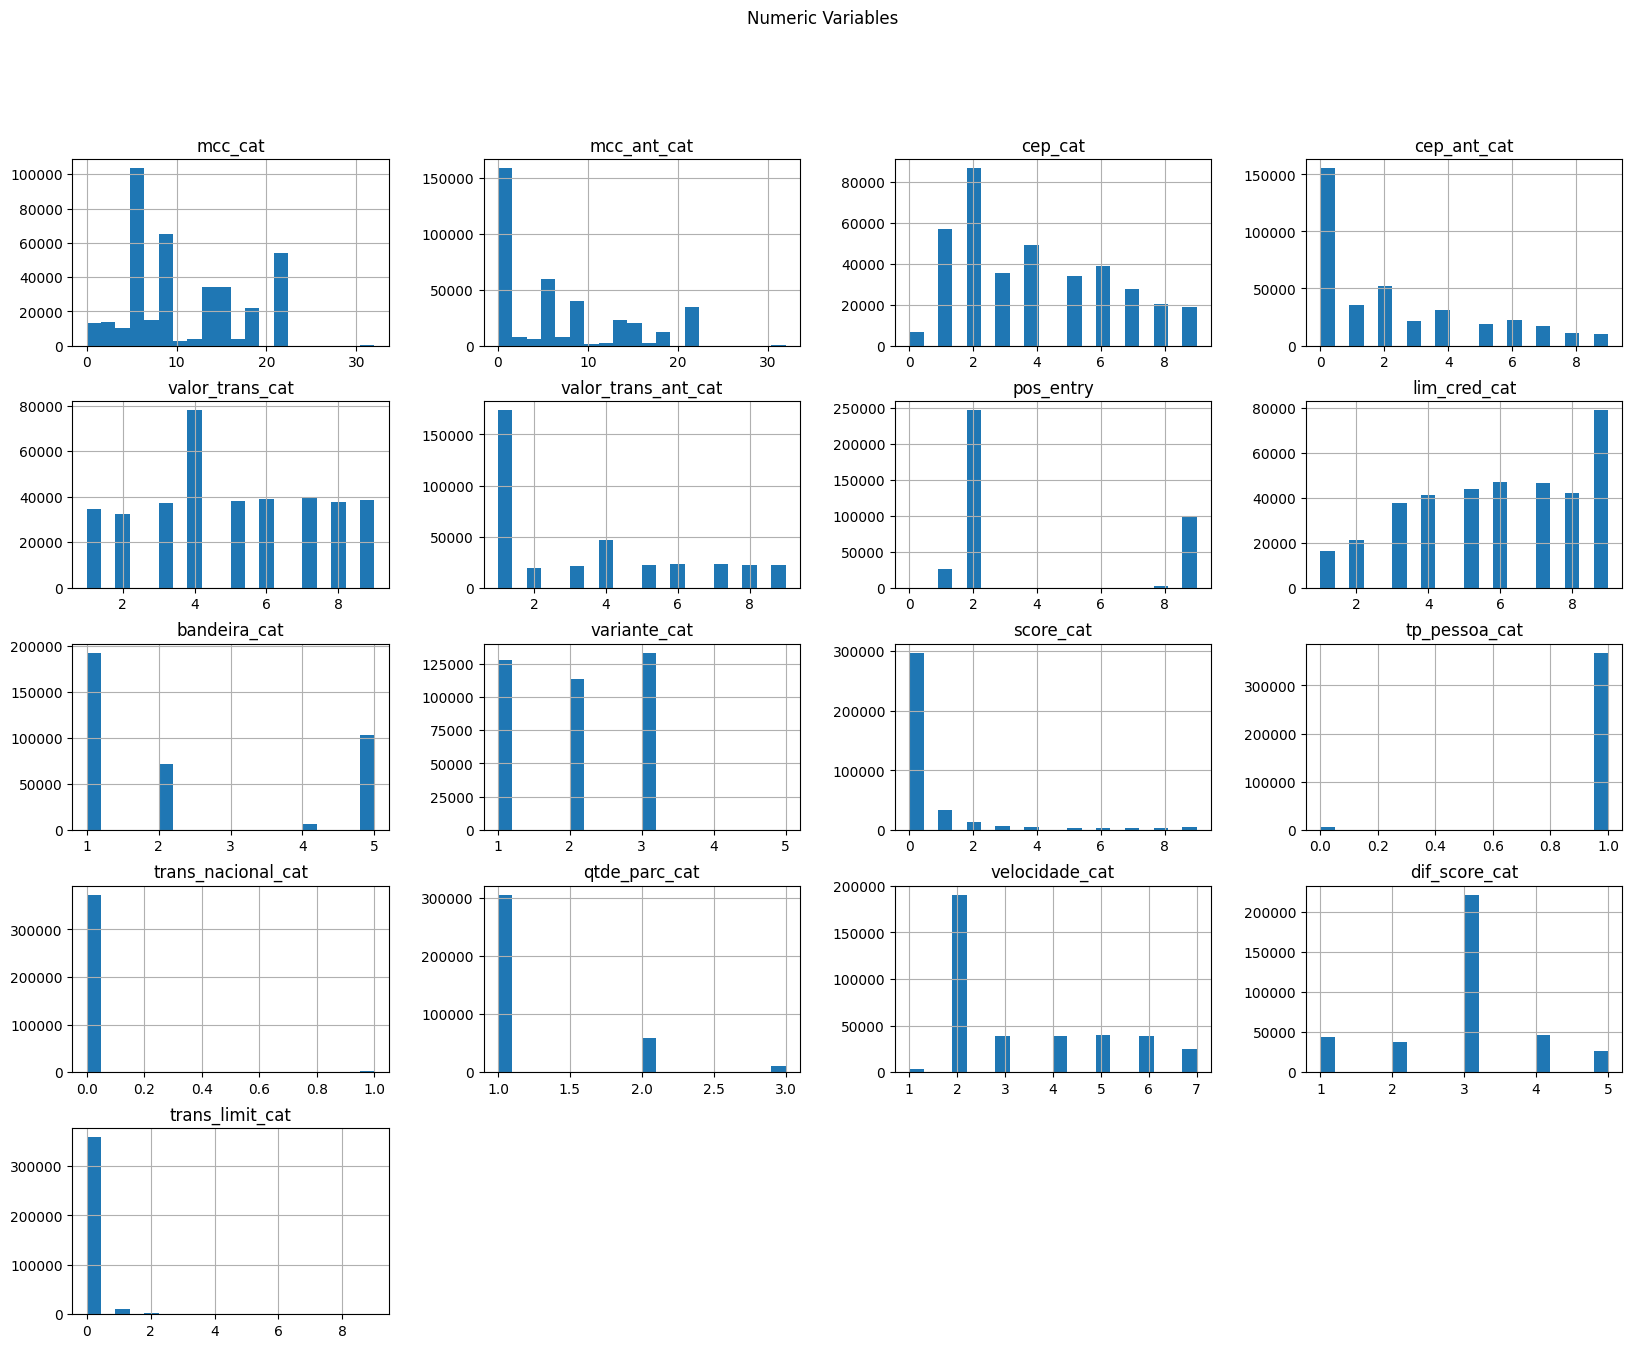

In [ ]:
nc = df.select_dtypes(include='number').columns
df[nc].hist(bins=20, figsize=(20, 15))
plt.suptitle('Numeric Variables')
plt.show()

In [ ]:
y= df['flag_fraude_cat'].map({b'N': 0, b'S': 1})
df.drop('flag_fraude_cat', axis=1, inplace=True)
y

0        0
1        0
2        1
3        0
4        0
        ..
12654    0
12655    0
12656    0
12657    0
12658    0
Name: flag_fraude_cat, Length: 374823, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
X_train.reset_index(drop=True, inplace = True)
X_test.reset_index(drop=True, inplace = True)

In [ ]:
learn_scaler=StandardScaler().fit(X_train)
X_train_normal = learn_scaler.transform(X_train)
X_test_normal = learn_scaler.transform(X_test)

In [ ]:
def visualize (label, is_test):
    if is_test:

        print("PCA 2D: ")
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.scatter(reducted_test[:,0], reducted_test[:,1], c=label, cmap="viridis", alpha=0.4)
        plt.show()
        print()

    else:
        print("PCA 2D: ")
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.scatter(reducted_data[:,0], reducted_data[:,1], c=label, cmap="viridis", alpha=0.4)
        plt.show()
        print()



In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
data_frame_pca = pca.fit_transform(X_train_normal)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
reducted_data = np.copy(data_frame_pca)
reducted_data.shape

(299858, 17)

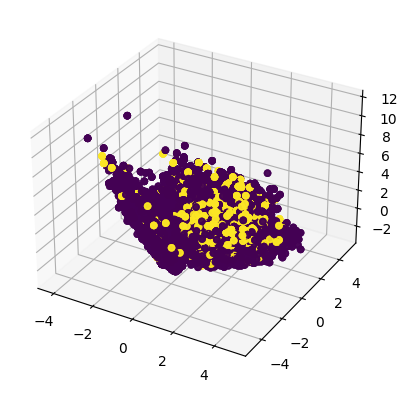

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=y_train, cmap="viridis", alpha=0.4)
plt.show()

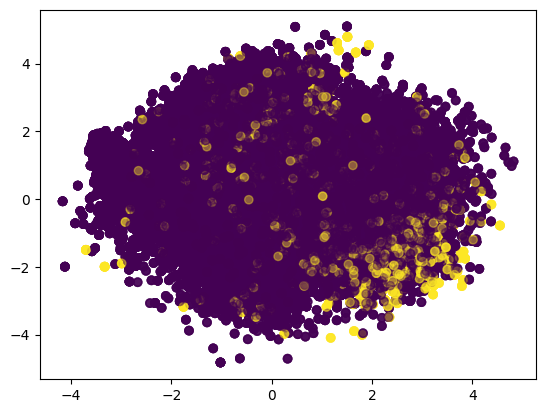

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=y_train, cmap="viridis", alpha=0.4)
plt.show()

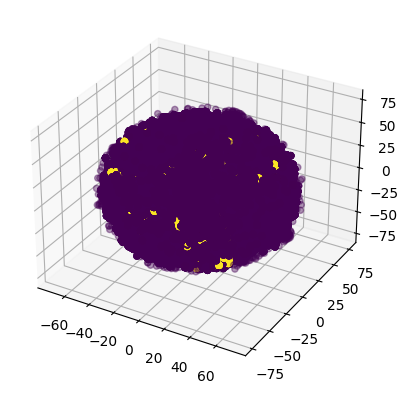

In [ ]:
from sklearn.manifold import TSNE
TSNE_3D_embedding = TSNE(n_components=3, learning_rate='auto', init='random')
embedded_3d_data = TSNE_3D_embedding.fit_transform(X_train_normal)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded_3d_data[:,0], embedded_3d_data[:,1], embedded_3d_data[:,2], c=y_train, cmap="viridis", alpha=0.4)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
TSNE_2D_embedding = TSNE(n_components=2, learning_rate='auto', init='random')
embedded_2d_data = TSNE_2D_embedding.fit_transform(X_train_normal)

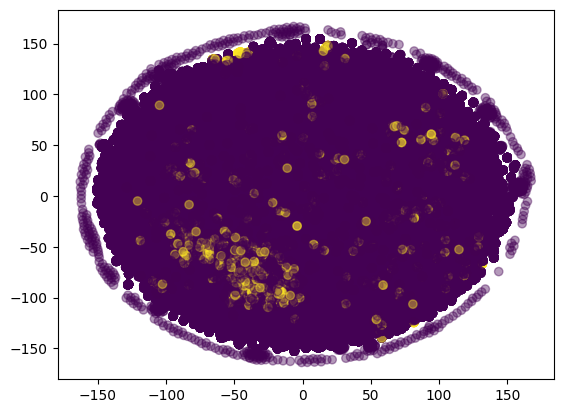

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(embedded_2d_data[:,0], embedded_2d_data[:,1], c=y_train, cmap="viridis", alpha=0.4)
plt.show()

mcc_cat                   Axes(0.125,0.807358;0.352273x0.0726415)
mcc_ant_cat            Axes(0.547727,0.807358;0.352273x0.0726415)
cep_cat                   Axes(0.125,0.720189;0.352273x0.0726415)
cep_ant_cat            Axes(0.547727,0.720189;0.352273x0.0726415)
valor_trans_cat           Axes(0.125,0.633019;0.352273x0.0726415)
valor_trans_ant_cat    Axes(0.547727,0.633019;0.352273x0.0726415)
pos_entry                 Axes(0.125,0.545849;0.352273x0.0726415)
lim_cred_cat           Axes(0.547727,0.545849;0.352273x0.0726415)
bandeira_cat              Axes(0.125,0.458679;0.352273x0.0726415)
variante_cat           Axes(0.547727,0.458679;0.352273x0.0726415)
score_cat                 Axes(0.125,0.371509;0.352273x0.0726415)
tp_pessoa_cat          Axes(0.547727,0.371509;0.352273x0.0726415)
trans_nacional_cat         Axes(0.125,0.28434;0.352273x0.0726415)
qtde_parc_cat           Axes(0.547727,0.28434;0.352273x0.0726415)
velocidade_cat             Axes(0.125,0.19717;0.352273x0.0726415)
dif_score_

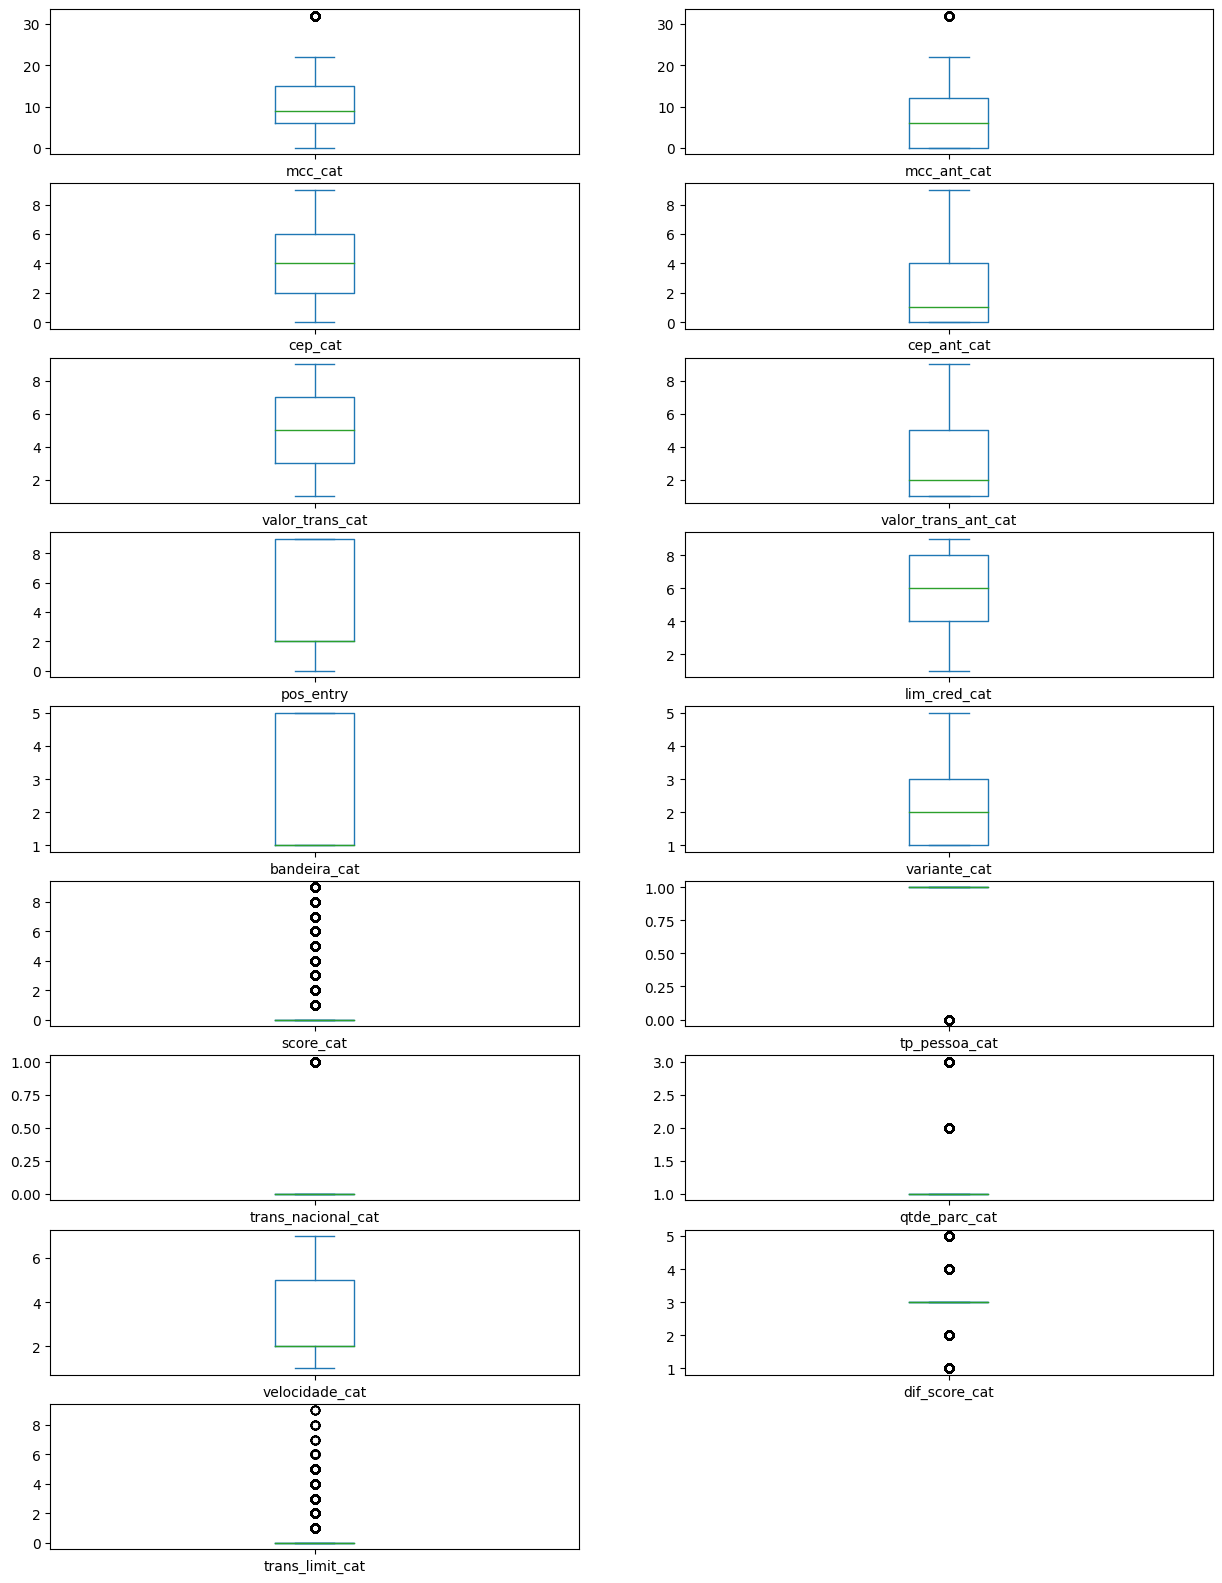

In [ ]:
X_train.plot(kind="box",subplots=True,layout=(9,2),figsize=(15,20))

In [ ]:
def iqr_outlier(x, factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


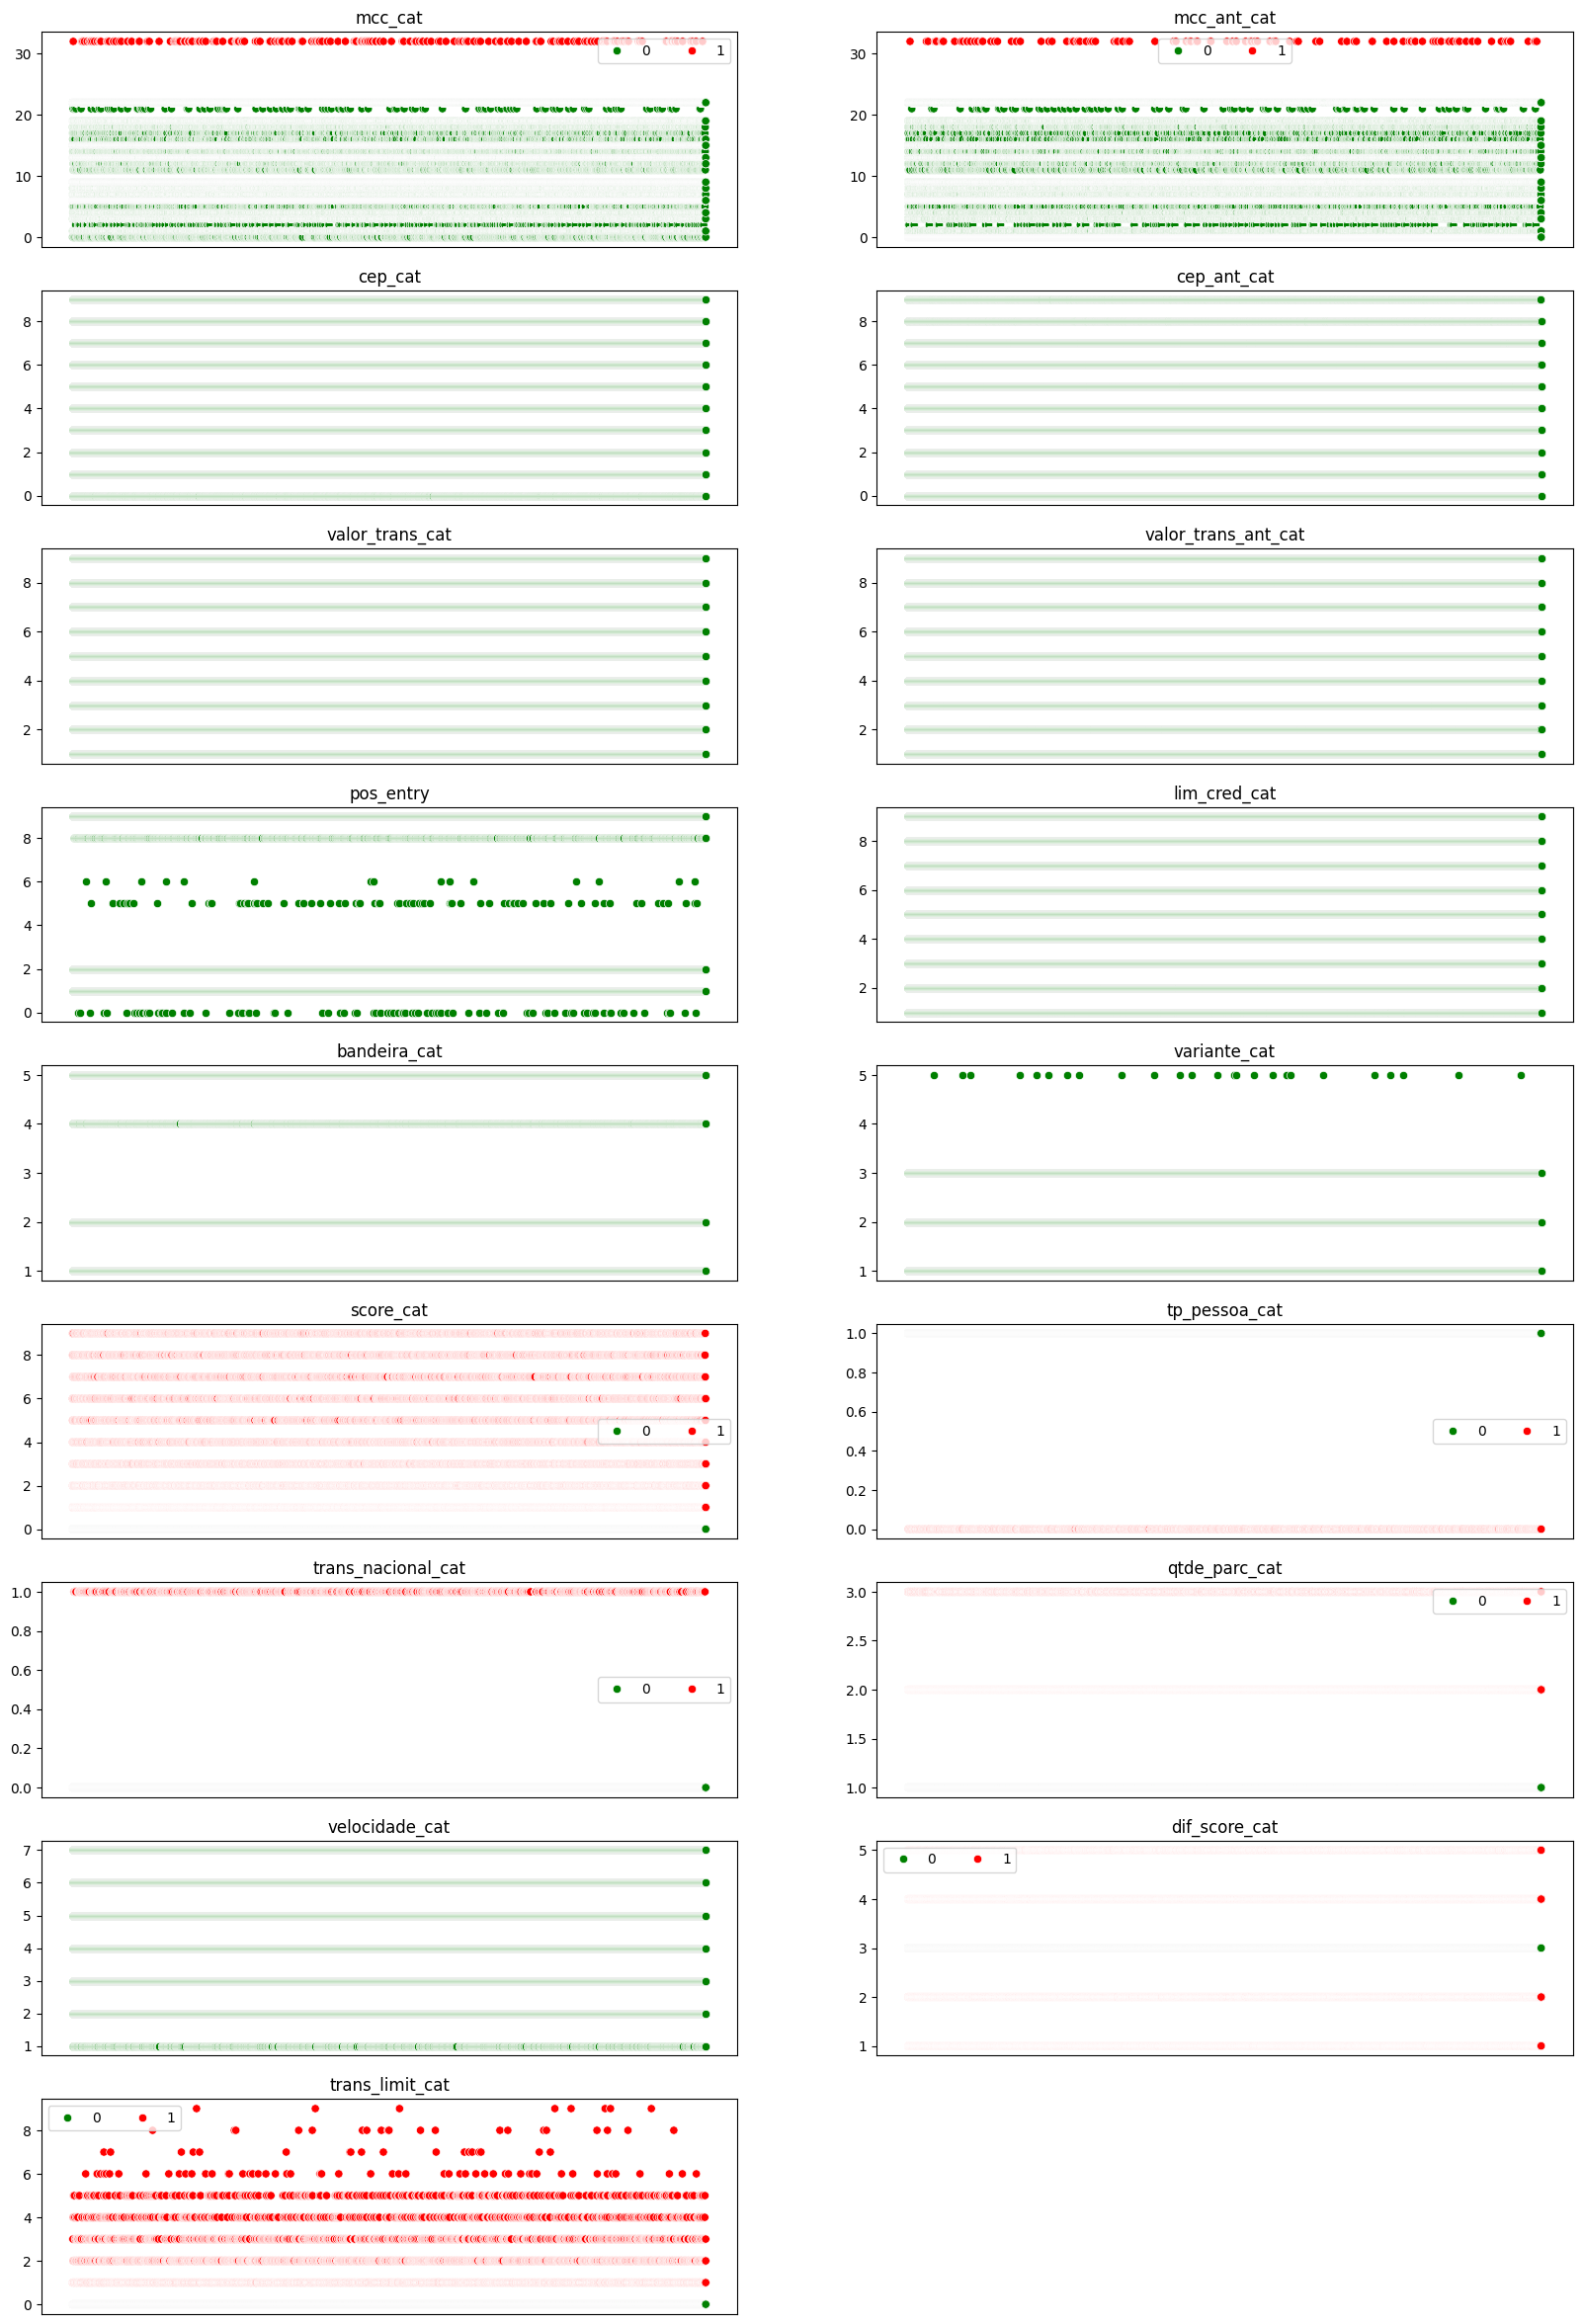

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(20, 30))
outliers_data = []
row = col = 0
for n,i in enumerate(X_train.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(X_train[i], 1.5)
    outliers_data.extend(outliers.index[outliers == 1].tolist())


    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


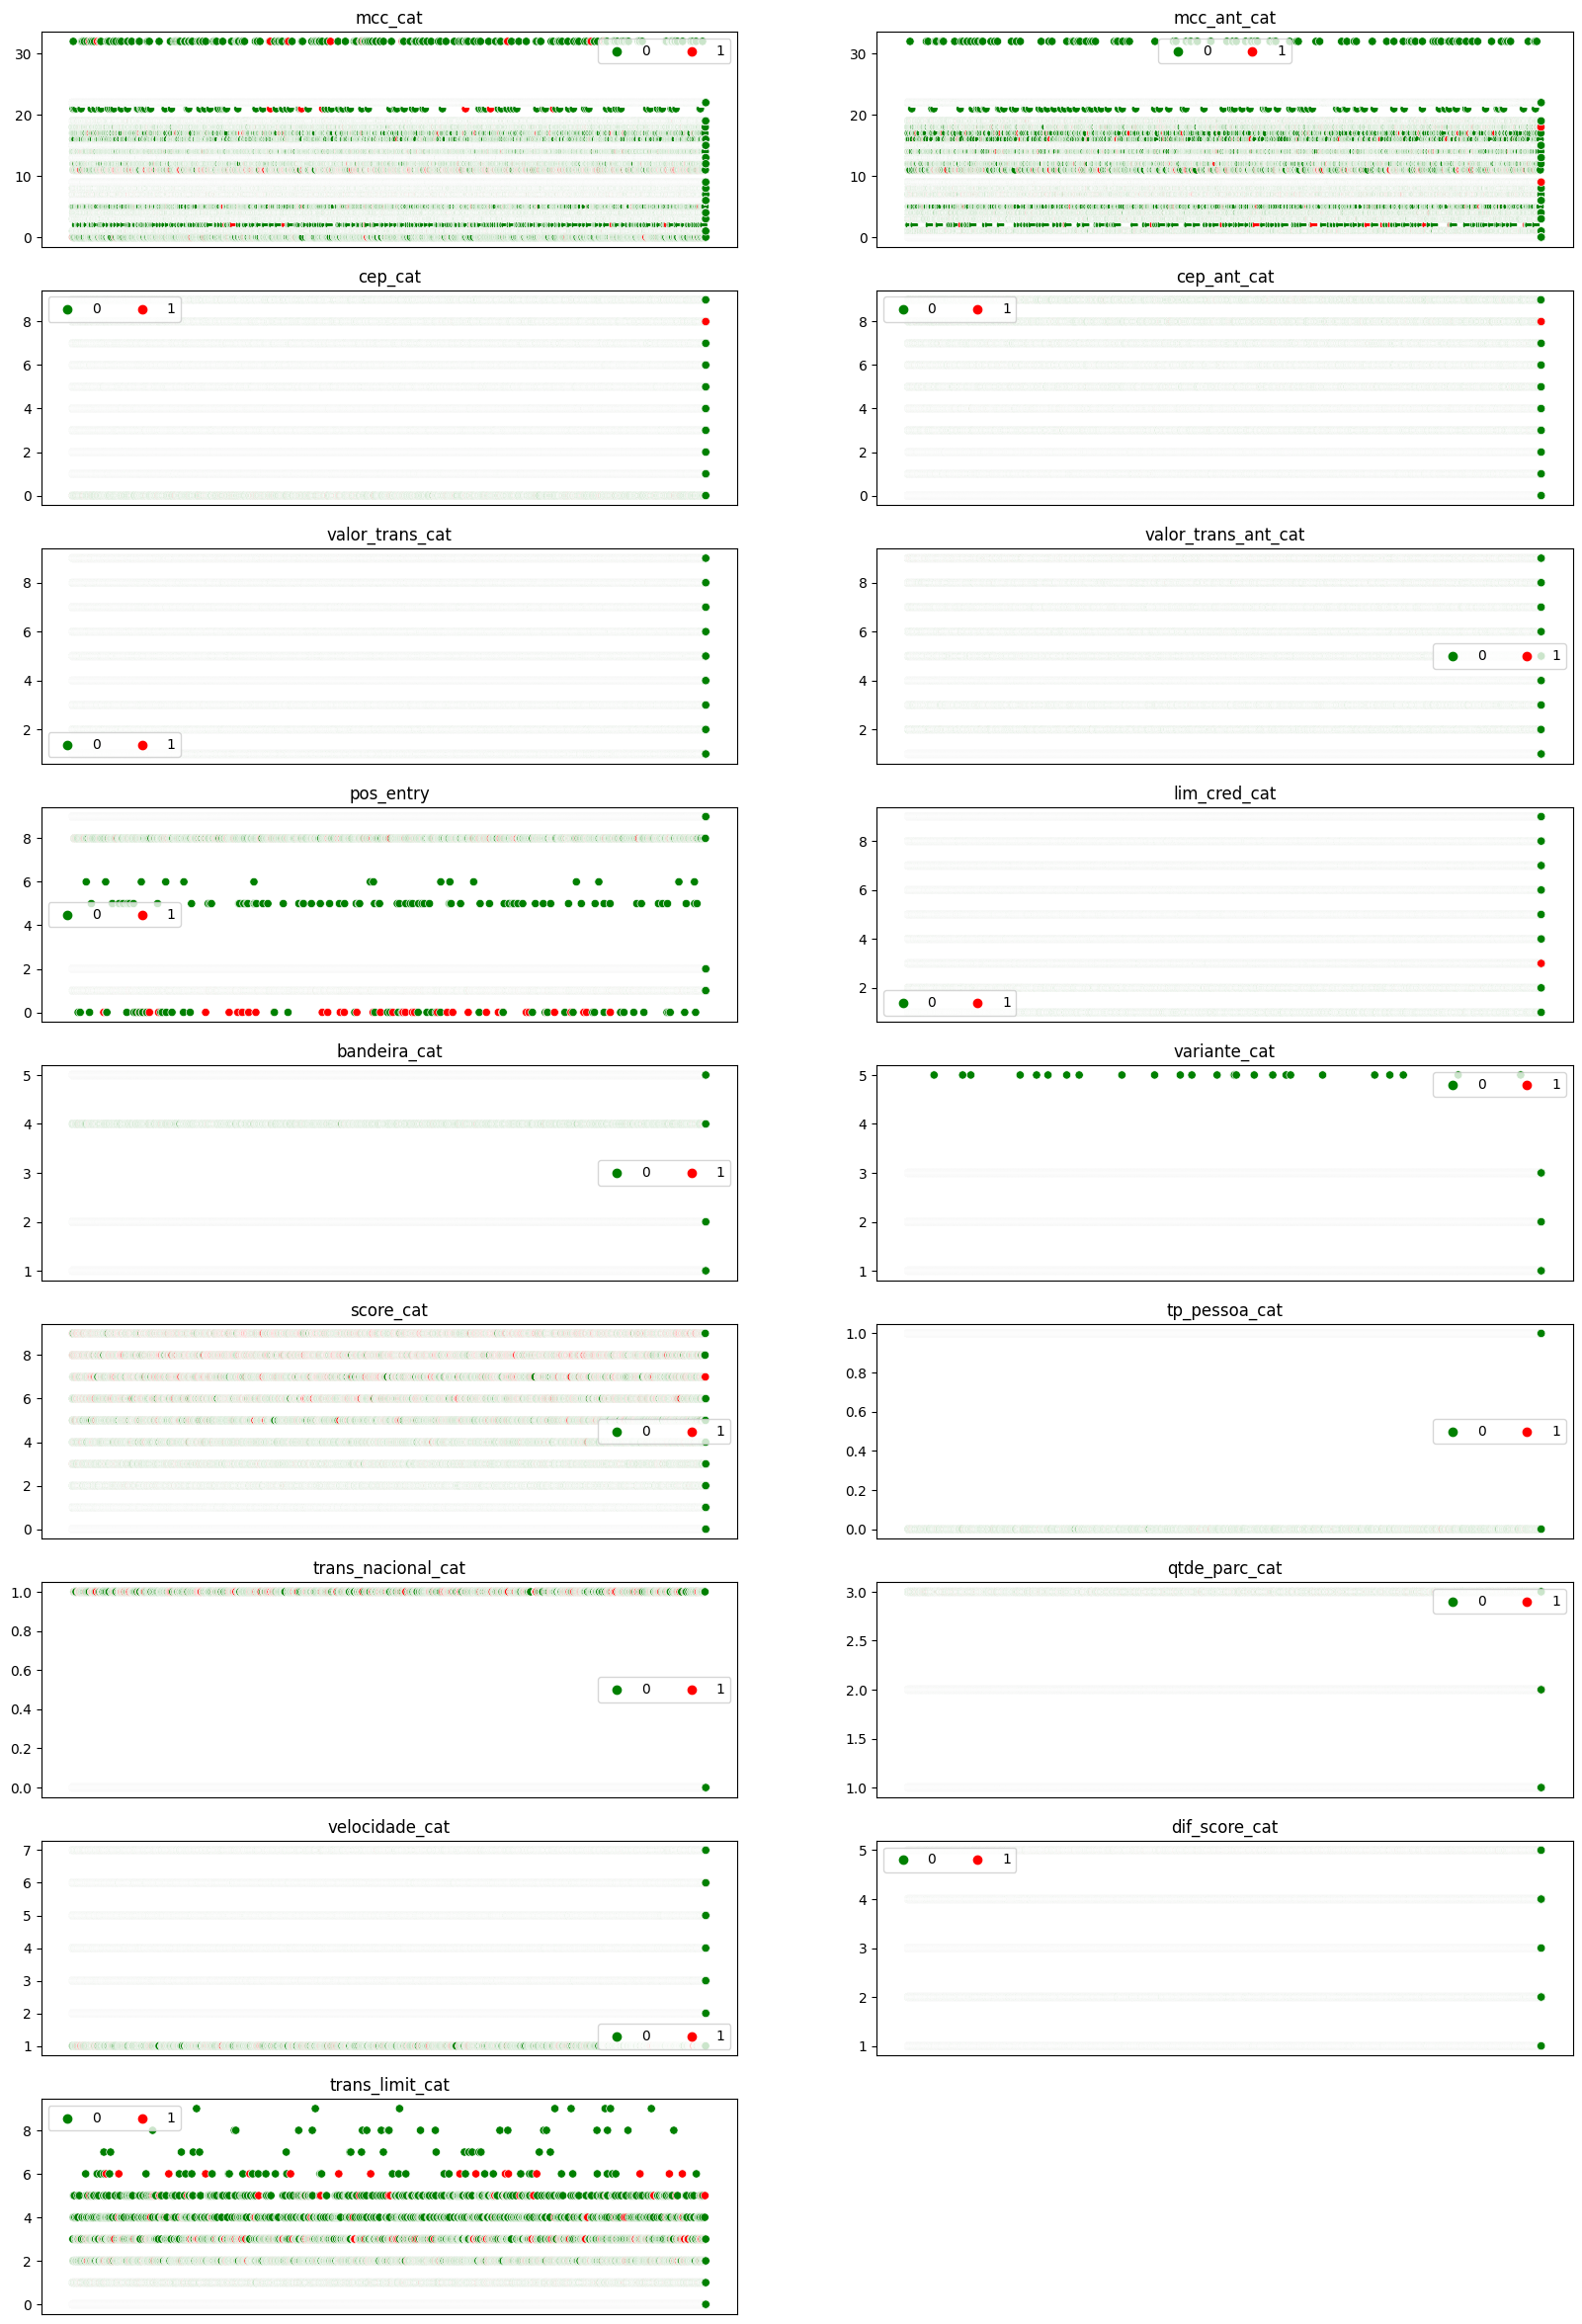

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(X_train.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], hue = np.array(y_train), palette = ['green','red'])
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def calculate_metrics (y_true, y_pred, is_prob = False, threshold = 0.5):

    metrics_list = []

    if (is_prob):
        y_predict = np.where(y_pred>threshold, 1, 0)

        print("precision_score:", precision_score(y_true, y_predict, average='macro'))
        metrics_list.append(precision_score(y_true, y_predict, average='macro'))

        print("recall_score:", recall_score(y_true, y_predict, average='macro'))
        metrics_list.append(recall_score(y_true, y_predict, average='macro'))

        print("f1_score:", f1_score(y_true, y_predict, average='macro'))
        metrics_list.append(f1_score(y_true, y_predict, average='macro'))

        print("accuracy_score:", accuracy_score(y_true, y_predict))
        metrics_list.append(accuracy_score(y_true, y_predict))

        print()
        print(classification_report(y_true, y_predict))
        print()
        cm = confusion_matrix(y_true, y_predict)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
        disp.plot()
        plt.show()


        fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred)
        print("AUC score is ", metrics.roc_auc_score(y_true, y_pred))
        metrics_list.append(metrics.roc_auc_score(y_true, y_pred))
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
        auc_precision_recall = metrics.auc(recall, precision)
        print("AUPRC score is ", auc_precision_recall)
        metrics_list.append(auc_precision_recall)
        plt.plot(recall, precision)
        plt.ylabel('precision')
        plt.xlabel('recall')
        plt.show()

    else:
        print("precision_score:", precision_score(y_true, y_pred, average='macro'))
        metrics_list.append(precision_score(y_true, y_pred, average='macro'))

        print("recall_score:", recall_score(y_true, y_pred, average='macro'))
        metrics_list.append(recall_score(y_true, y_pred, average='macro'))

        print("f1_score:", f1_score(y_true, y_pred, average='macro'))
        metrics_list.append(f1_score(y_true, y_pred, average='macro'))

        print("accuracy_score:", accuracy_score(y_true, y_pred))
        metrics_list.append(accuracy_score(y_true, y_pred))

        print()
        print(classification_report(y_true, y_pred))
        print()
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
        disp.plot()
        plt.show()

    return(metrics_list)

In [ ]:
y_pred = np.zeros_like(y_train)
y_pred[list(set(outliers_data))] = 1
calculate_metrics(y_train, y_pred)

NameError: name 'outliers_data' is not defined

PCA 2D: 


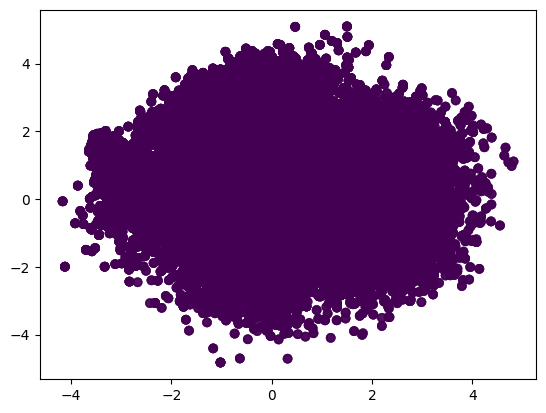

In [ ]:
visualize (y_pred, False)

In [ ]:
def zscore_outlier(x, factor):
    mu = x.mean().copy()
    sd = x.std().copy()
    ub = factor
    lb = -factor
    zscore = ((x - mu) / sd)
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


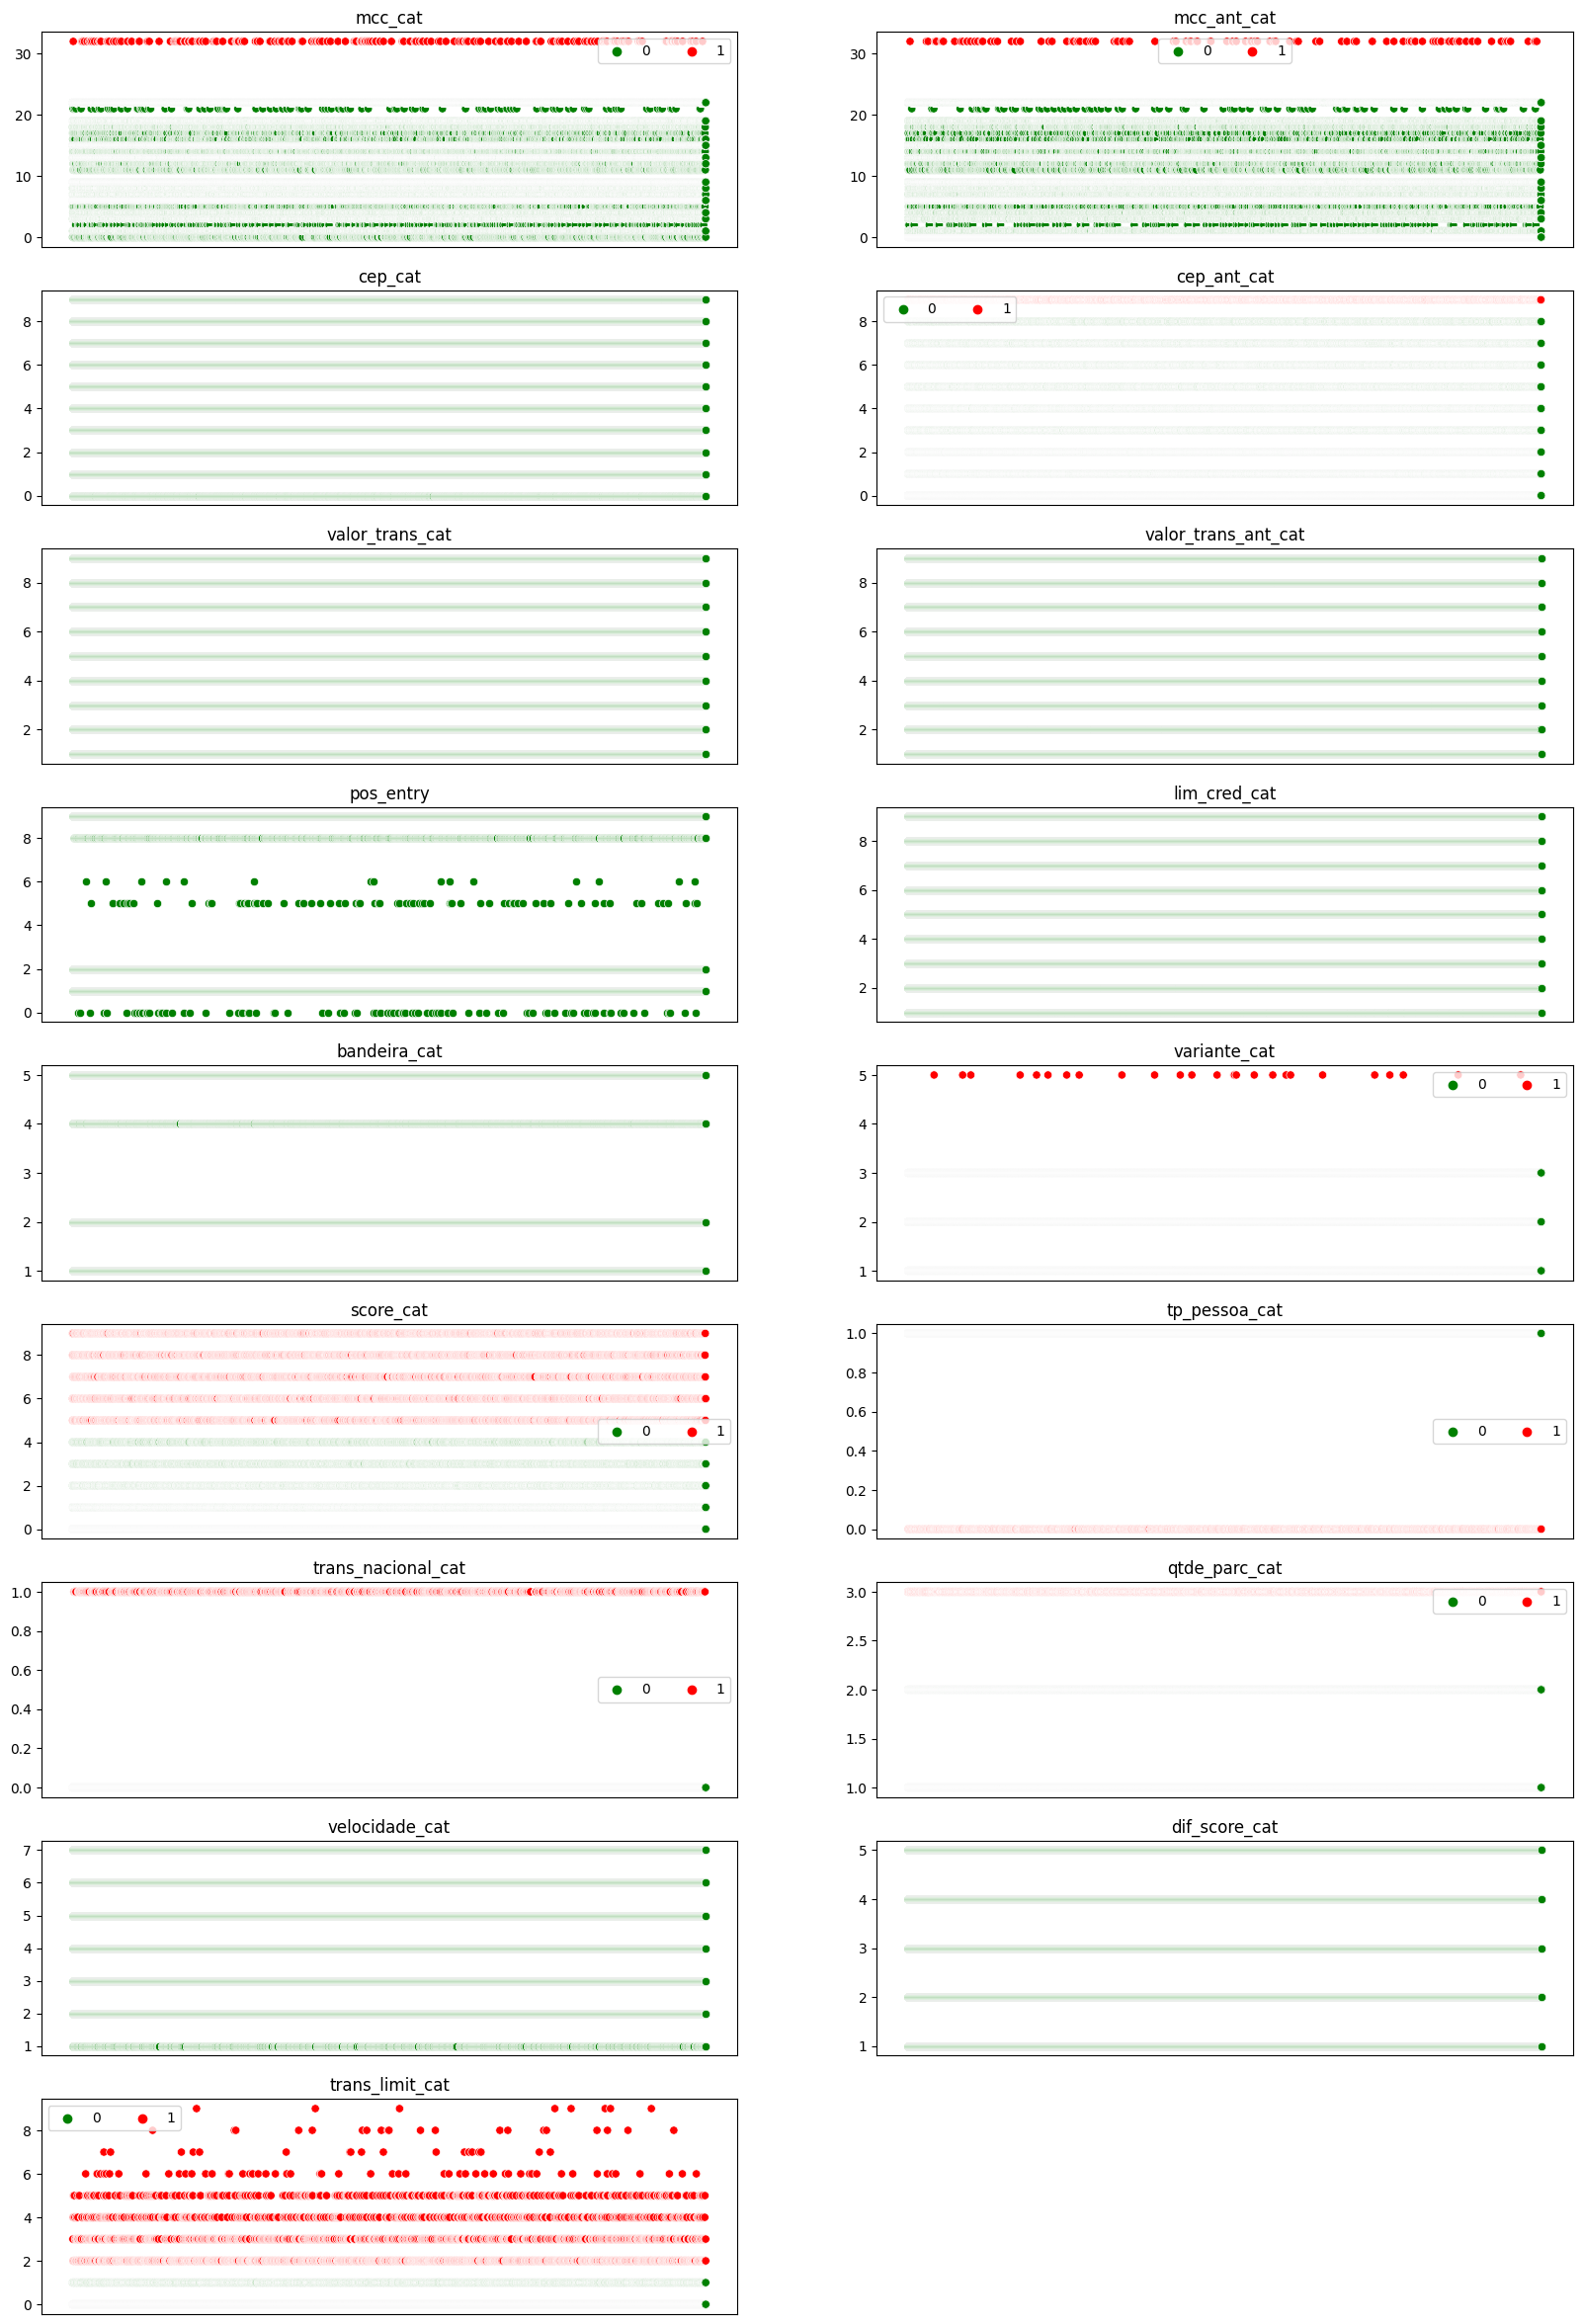

In [ ]:

fig, ax = plt.subplots(9, 2, figsize=(20, 30))
outliers_data = []
row = col = 0
for n,i in enumerate(X_train.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(X_train[i], 2.5 )
    outliers_data.extend(outliers.index[outliers == 1].tolist())

    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


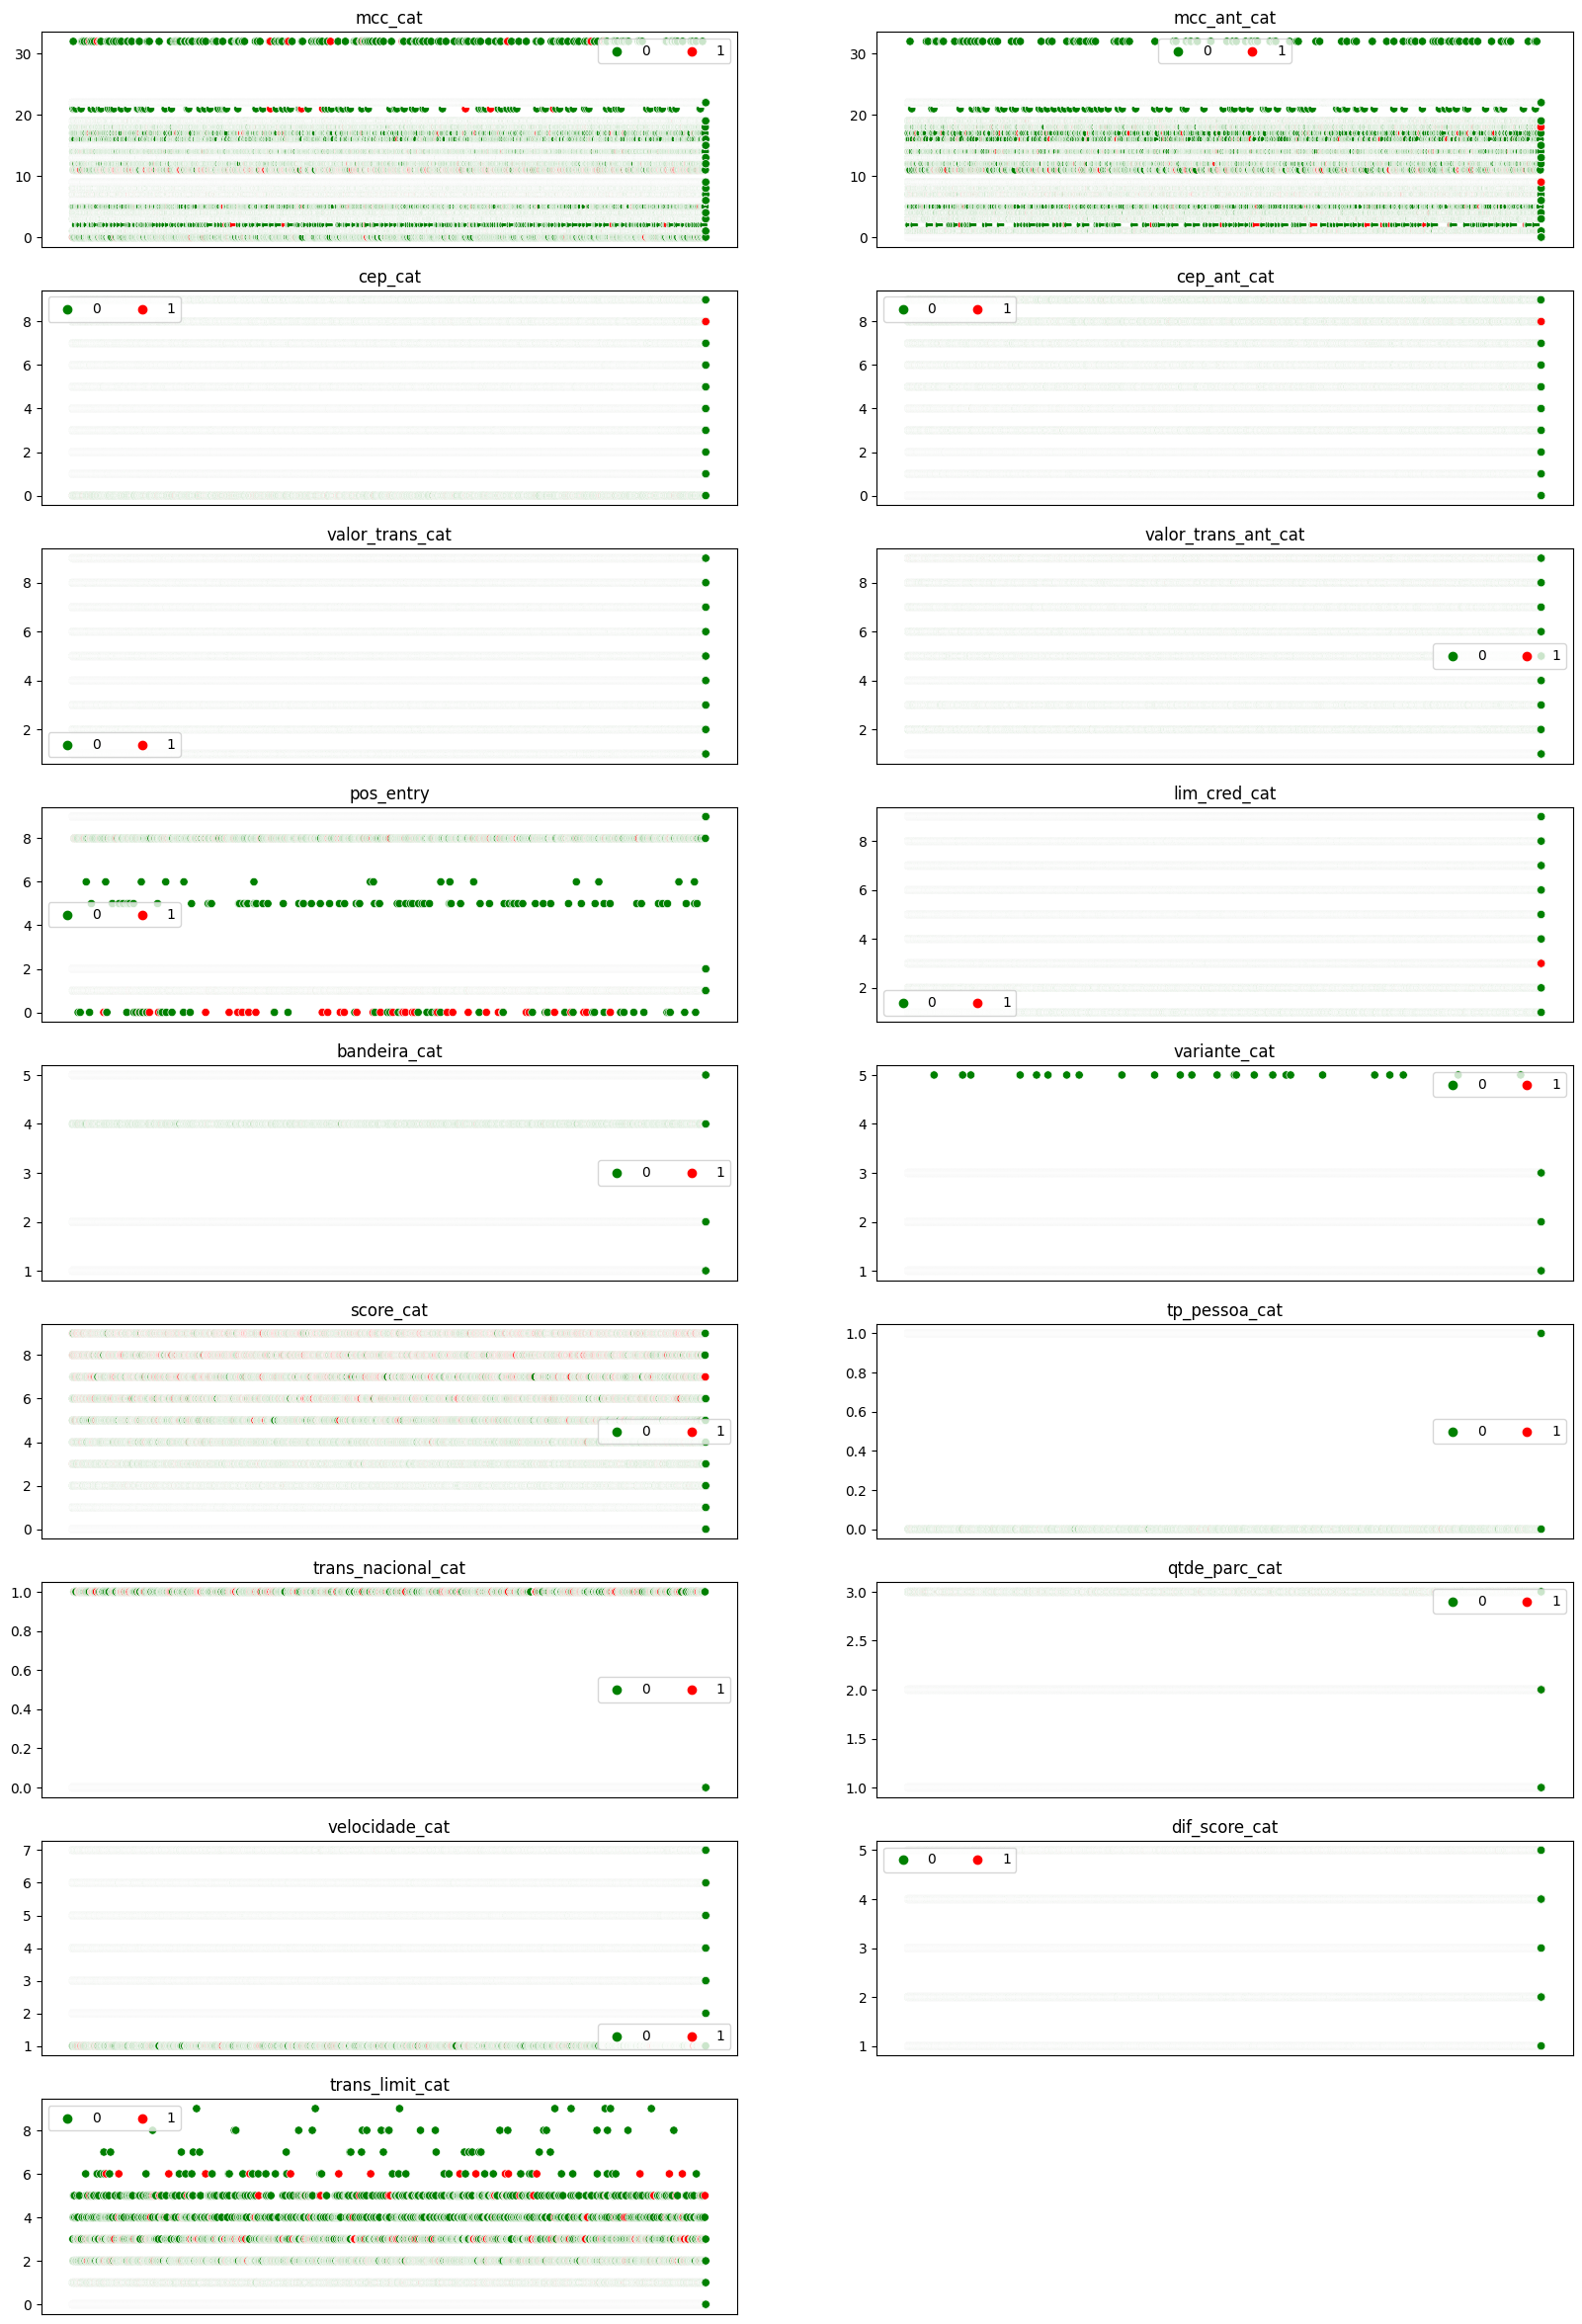

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(X_train.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], hue = np.array(y_train), palette = ['green','red'])
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

precision_score: 0.5706522761485011
recall_score: 0.7063904521225337
f1_score: 0.591161451376123
accuracy_score: 0.8817106763868231

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    288633
           1       0.16      0.52      0.25     11225

    accuracy                           0.88    299858
   macro avg       0.57      0.71      0.59    299858
weighted avg       0.95      0.88      0.91    299858




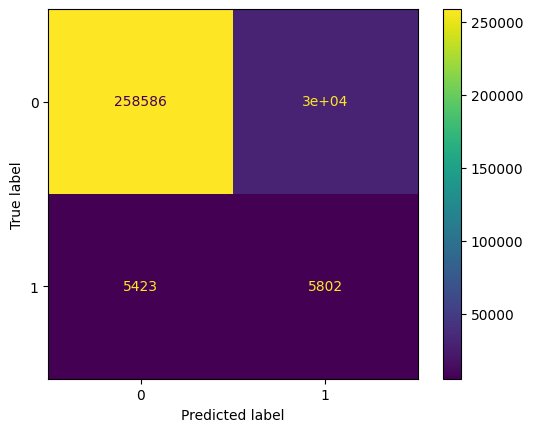

[0.5706522761485011, 0.7063904521225337, 0.591161451376123, 0.8817106763868231]

In [ ]:
y_pred = np.zeros_like(y_train)
y_pred[list(set(outliers_data))] = 1
calculate_metrics(y_train, y_pred)

PCA 2D: 


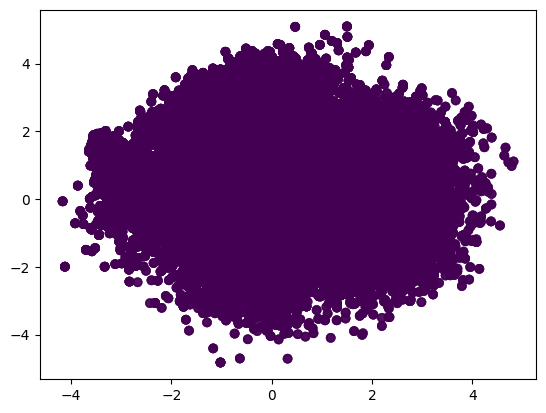

In [ ]:
visualize (y_pred, False)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
anomaly_detector = OneClassSVM(nu=0.01)
anomaly_detector.fit(X_train)
train_anomaly_predictions = anomaly_detector.predict(X_train)
test_anomaly_predictions = anomaly_detector.predict(X_test)
train_anomalies = train_anomaly_predictions == -1
test_anomalies = test_anomaly_predictions == -1
print("OneClassSVM anomalies-training set:", train_anomalies.sum())
print("OneClassSVM anomalies-test set:", test_anomalies.sum())


OneClassSVM anomalies-training set: 3026
OneClassSVM anomalies-test set: 745


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(contamination=0.01, novelty=True)
lof_model.fit(X_train)
train_anomalies_lof =lof_model.predict(X_train) == -1
print("LOF anomalies-training set:", train_anomalies.sum())
test_anomalies_lof = lof_model.predict(X_test) == -1
print("LOF anomalies-test set:", test_anomalies_lof.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


LOF anomalies-training set: 3026


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


LOF anomalies-test set: 678


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report
print("Original Data:")
accuracy_original, report_original = train_and_evaluate(X_train, y_train, X_test, y_test)
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("\n Random Oversampling:")
accuracy_ros, report_ros = train_and_evaluate(X_train_ros, y_train_ros, X_test, y_test)
print("Accuracy:", accuracy_ros)
print("Classification Report:\n", report_ros)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\n SMOTE:")
accuracy_smote, report_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test)
print("Accuracy:", accuracy_smote)
print("Classification Report:\n", report_smote)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("\nRandom Undersampling:")
accuracy_rus, report_rus = train_and_evaluate(X_train_rus, y_train_rus, X_test, y_test)
print("Accuracy:", accuracy_rus)
print("Classification Report:\n", report_rus)



Original Data:
Accuracy: 0.999826585740012
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     72159
           1       1.00      1.00      1.00      2806

    accuracy                           1.00     74965
   macro avg       1.00      1.00      1.00     74965
weighted avg       1.00      1.00      1.00     74965


 Random Oversampling:
Accuracy: 0.999719869272327
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     72159
           1       0.99      1.00      1.00      2806

    accuracy                           1.00     74965
   macro avg       1.00      1.00      1.00     74965
weighted avg       1.00      1.00      1.00     74965


 SMOTE:
Accuracy: 0.999719869272327
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     72159
           1       0.99      1.00 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1
table = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1'])
accuracy_original, precision_original, recall_original, f1_original = train_and_evaluate(X_train, y_train, X_test, y_test)
table  = table .append({'Method': 'Original', 'Accuracy': accuracy_original, 'Precision': precision_original, 'Recall': recall_original, 'F1': f1_original}, ignore_index=True)
accuracy_ros, precision_ros, recall_ros, f1_ros = train_and_evaluate(X_train_ros, y_train_ros, X_test, y_test)
table  = table .append({'Method': 'Random Oversampling', 'Accuracy': accuracy_ros, 'Precision': precision_ros, 'Recall': recall_ros, 'F1': f1_ros}, ignore_index=True)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test)
table  = table .append({'Method': 'SMOTE', 'Accuracy': accuracy_smote, 'Precision': precision_smote, 'Recall': recall_smote, 'F1': f1_smote}, ignore_index=True)
accuracy_rus, precision_rus, recall_rus, f1_rus = train_and_evaluate(X_train_rus, y_train_rus, X_test, y_test)
table  = table .append({'Method': 'Random Undersampling', 'Accuracy': accuracy_rus, 'Precision': precision_rus, 'Recall': recall_rus, 'F1': f1_rus}, ignore_index=True)
table


<ipython-input-14-cec36dbc3ca9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table  = table .append({'Method': 'Original', 'Accuracy': accuracy_original, 'Precision': precision_original, 'Recall': recall_original, 'F1': f1_original}, ignore_index=True)
<ipython-input-14-cec36dbc3ca9>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table  = table .append({'Method': 'Random Oversampling', 'Accuracy': accuracy_ros, 'Precision': precision_ros, 'Recall': recall_ros, 'F1': f1_ros}, ignore_index=True)
<ipython-input-14-cec36dbc3ca9>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table  = table .append({'Method': 'SMOTE', 'Accuracy': accuracy_smote, 'Precision': precision_smote, 'Recall': recall_smote, 'F1': f1_smote}, ig

Method  Accuracy  Precision    Recall        F1
0              Original  0.999827   0.997861  0.997505  0.997683
1   Random Oversampling  0.999720   0.992572  1.000000  0.996272
2                 SMOTE  0.999720   0.992572  1.000000  0.996272
3  Random Undersampling  0.977283   0.622311  1.000000  0.767191

In [ ]:
def WindowGenerator(data_in, time_step, label):
    X_comb = []
    Y_comb = []
    target_ = int(time_step/2) + 1
    for mth in range(0, len(data_in)-(time_step)):
        X_start=mth
        X_end=mth + time_step
        X_comb.append(data_in[X_start:X_end, :])
        Y_comb.append(label[X_start + target_])
    return(np.array(X_comb), np.array(Y_comb))

In [ ]:
entire_data = []
for spdt in ["02","03", "04", "05", "06", "07", "08", "09", "10"]:
    drive.mount('/content/gdrive')
    data = arff.loadarff('gdrive/My Drive/base_desenv_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_data.append(sub_df)

entire_test = []
for spdt in ["02","03", "04", "05", "06", "07", "08", "09", "10"]:
    drive.mount('/content/gdrive')
    data = arff.loadarff('gdrive/My Drive/base_validacao_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_test.append(sub_df)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call driv

In [ ]:
df = pd.concat(entire_data)
df_test = pd.concat(entire_test)
y_train = df['flag_fraude_cat'].map({b'N': 0, b'S': 1})
df.drop('flag_fraude_cat', axis=1, inplace=True)
y_train = np.array(y_train)
y_test = df_test['flag_fraude_cat'].map({b'N': 0, b'S': 1})
df_test.drop('flag_fraude_cat', axis=1, inplace=True)
y_test = np.array(y_test)
learn_scaler=StandardScaler().fit(df)
X_train = learn_scaler.transform(df)
X_test = learn_scaler.transform(df_test)

In [ ]:
X_train_time_seri, y_train_time_seri = WindowGenerator(X_train, 5, y_train)
X_test_time_seri, y_test_time_seri = WindowGenerator(X_test, 5, y_test)
X_train_time_seri.shape

(262101, 5, 17)

In [ ]:
def lstm_model ():
    window = tf.keras.layers.Input(shape = (5, 17))
    layer_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True))(window)
    layer_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10))(layer_1)
    layer_3 = tf.keras.layers.Dense(200, activation="sigmoid")(layer_2)
    layer_4 = tf.keras.layers.Dense(200, activation="sigmoid")(layer_3)
    pred = tf.keras.layers.Dense(1, activation="sigmoid")(layer_4)
    model = tf.keras.Model(inputs=[window], outputs=[pred])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    return(model)

In [ ]:
model_time_seri = lstm_model()
model_time_seri.summary()
history = model_time_seri.fit(
    X_train_time_seri, y_train_time_seri,
    batch_size=64,
    epochs=10,
    verbose="auto",
    callbacks=None,
    validation_split=0.1,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 17)]           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 5, 20)             2240      
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 20)                2480      
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 200)               4200      
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 1)                 201 

3523/3523 [==============================] - 8s 2ms/step
precision_score: 0.8162597734951463
recall_score: 0.7027101133525095
f1_score: 0.7458742825644555
accuracy_score: 0.9701007878486763

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    108522
           1       0.65      0.41      0.51      4190

    accuracy                           0.97    112712
   macro avg       0.82      0.70      0.75    112712
weighted avg       0.97      0.97      0.97    112712




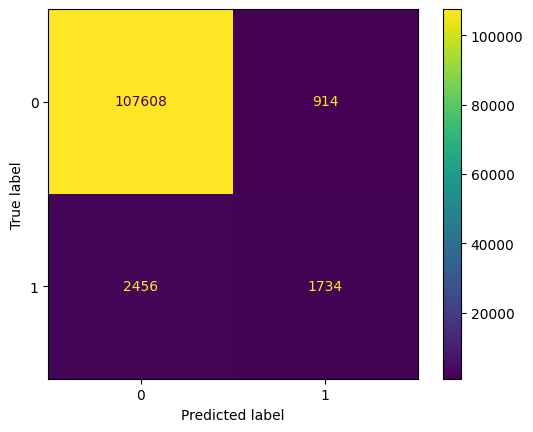

AUC score is  0.9315312043236265


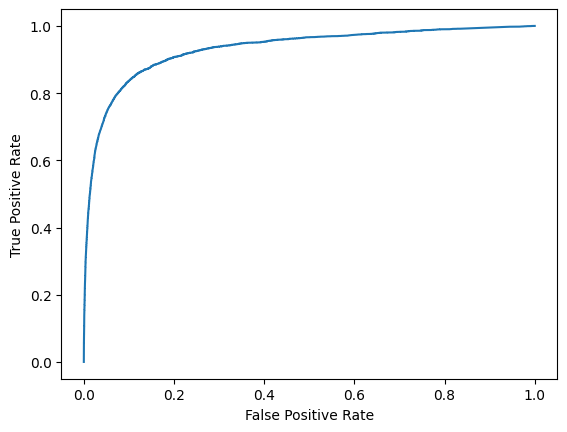

AUPRC score is  0.5511877334211074


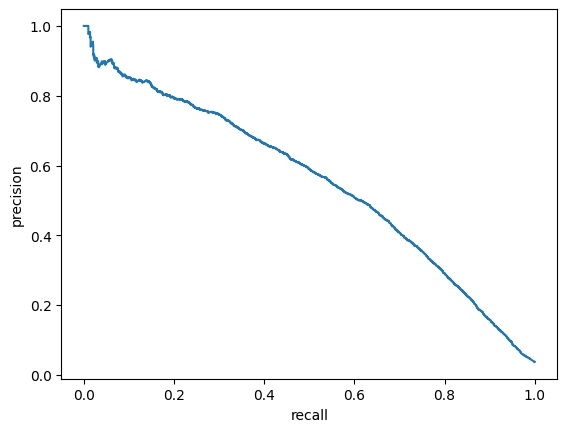

[0.8162597734951463,
 0.7027101133525095,
 0.7458742825644555,
 0.9701007878486763,
 0.9315312043236265,
 0.5511877334211074]

In [ ]:
y_pred = model_time_seri.predict(X_test_time_seri)
calculate_metrics(y_test_time_seri, y_pred, is_prob=True)